In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../Data/Kaggle/StoreSales/new_train.csv")

In [3]:
df.head()

,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,1,AUTOMOTIVE,0.0,0,Holiday,93.14,Quito,Pichincha,D,13,2,1,1,2013
1,1,BABY CARE,0.0,0,Holiday,93.14,Quito,Pichincha,D,13,2,1,1,2013
2,1,BEAUTY,0.0,0,Holiday,93.14,Quito,Pichincha,D,13,2,1,1,2013
3,1,BEVERAGES,0.0,0,Holiday,93.14,Quito,Pichincha,D,13,2,1,1,2013
4,1,BOOKS,0.0,0,Holiday,93.14,Quito,Pichincha,D,13,2,1,1,2013


In [4]:
df.tail()

,store_nbr,family,sales,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
3000883,9,POULTRY,438.133,0,Holiday,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000884,9,PREPARED FOODS,154.553,1,Holiday,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000885,9,PRODUCE,2419.729,148,Holiday,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,47.57,Quito,Pichincha,B,6,2,15,8,2017
3000887,9,SEAFOOD,16.000,0,Holiday,47.57,Quito,Pichincha,B,6,2,15,8,2017


In [5]:
X = df.drop(['sales'], axis=1)
y = df['sales']

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 13 columns):
 #   Column       Dtype  
---  ------       -----  
 0   store_nbr    int64  
 1   family       object 
 2   onpromotion  int64  
 3   typeholiday  object 
 4   dcoilwtico   float64
 5   city         object 
 6   state        object 
 7   typestores   object 
 8   cluster      int64  
 9   day_of_week  int64  
 10  day          int64  
 11  month        int64  
 12  year         int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 297.6+ MB


In [7]:
family_encoder = LabelEncoder()
typeholiday_encoder = LabelEncoder()
city_encoder = LabelEncoder()
state_encoder = LabelEncoder()
typestores_encoder = LabelEncoder()

In [8]:
X['family'] = family_encoder.fit_transform(X['family'])
X['typeholiday'] = typeholiday_encoder.fit_transform(X['typeholiday'])
X['city'] = city_encoder.fit_transform(X['city'])
X['state'] = state_encoder.fit_transform(X['state'])
X['typestores'] = typestores_encoder.fit_transform(X['typestores'])

In [9]:
with open('joblib/family_encoder.pkl', 'wb') as file:
    joblib.dump(family_encoder, file)
    
with open('joblib/typeholiday_encoder.pkl', 'wb') as file:
    joblib.dump(typeholiday_encoder, file)

with open('joblib/city_encoder.pkl', 'wb') as file:
    joblib.dump(city_encoder, file)
    
with open('joblib/state_encoder.pkl', 'wb') as file:
    joblib.dump(state_encoder, file)
    
with open('joblib/typestores_encoder.pkl', 'wb') as file:
    joblib.dump(typestores_encoder, file)

In [10]:
X.shape

(3000888, 13)

In [11]:
X.head()

,store_nbr,family,onpromotion,typeholiday,dcoilwtico,city,state,typestores,cluster,day_of_week,day,month,year
0,1,0,0,3,93.14,18,12,3,13,2,1,1,2013
1,1,1,0,3,93.14,18,12,3,13,2,1,1,2013
2,1,2,0,3,93.14,18,12,3,13,2,1,1,2013
3,1,3,0,3,93.14,18,12,3,13,2,1,1,2013
4,1,4,0,3,93.14,18,12,3,13,2,1,1,2013


In [12]:
split_index = int(0.8 * len(df))

In [13]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [14]:
batch_size = 1024

In [15]:
num_batches = len(X_train) // batch_size + 1

In [16]:
model = LGBMRegressor(objective='regression', n_estimators=100, random_state=42)

In [17]:
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size

    X_batch = X_train.iloc[start_idx:end_idx]
    y_batch = y_train.iloc[start_idx:end_idx]

    model.fit(X_batch, y_batch)

    print(f"Batch {i + 1}/{num_batches} completed")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 2.452753
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Batch 14/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 125.943483
Batch 15/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 198.493924
Batch 16/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000096 seconds.
You can set `f

Batch 35/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 126.694348
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 36/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training fro

Batch 53/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 175.085144
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 54/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 157.016069
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 55/2345 completed
[LightGBM] [Info] Auto-choosing

Batch 71/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 137.584033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 72/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM

Batch 90/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 154.477068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 91/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training fro

Batch 111/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 174.458226
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 112/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 102

Batch 132/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 183.585501
Batch 133/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 214.067271
Batch 134/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

Batch 153/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 197.791067
Batch 154/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 304.415916
Batch 155/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set

Batch 174/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 129.691269
Batch 175/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 207.417669
Batch 176/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Batch 199/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 162.051342
Batch 200/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 144.270157
Batch 201/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

Batch 220/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 200.107126
Batch 221/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 138.070925
Batch 222/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set

Batch 239/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 305.121135
Batch 240/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 224.593333
Batch 241/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set

Batch 259/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 150.718063
Batch 260/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 195.755859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

Batch 279/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 209.328854
Batch 280/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 152.366128
Batch 281/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set

Batch 300/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 289.541486
Batch 301/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 207.168566
Batch 302/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can se

Batch 321/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 210.049724
Batch 322/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 155.107170
Batch 323/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set

Batch 346/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 143.601860
Batch 347/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 206.718658
Batch 348/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

Batch 367/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 163.156489
Batch 368/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 236.493081
Batch 369/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can se

Batch 387/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 291.221368
Batch 388/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 167.715960
Batch 389/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

Batch 408/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 219.097832
Batch 409/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 186.835987
Batch 410/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can se

Batch 429/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 266.909193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 430/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 141.910954
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 431/2345 completed
[LightGBM] [Info] Auto-choosi

Batch 450/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 242.441497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 451/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 162.925427
Batch 452/2345 completed
[LightGBM] [Info] Auto-choosing row-wise

Batch 471/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 321.551594
Batch 472/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 317.530487
Batch 473/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can se

Batch 492/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 180.903321
Batch 493/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 275.275422
Batch 494/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Batch 513/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 151.337302
Batch 514/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 202.308242
Batch 515/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set

Batch 534/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 219.465388
Batch 535/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 108
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 279.980702
Batch 536/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can se

Batch 560/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 175.744912
Batch 561/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 107
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 206.059980
Batch 562/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set

Batch 585/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 199.954997
Batch 586/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 117
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 247.952556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Batch 587/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.


Batch 604/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 227.325732
Batch 605/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 376.805217
Batch 606/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

Batch 625/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 224.307462
Batch 626/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 284.843997
Batch 627/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set

Batch 639/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 527.125963
Batch 640/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 372
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 437.374058
Batch 641/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set

Batch 660/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 313.727048
Batch 661/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 223.821054
Batch 662/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set

Batch 681/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 302.700453
Batch 682/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 229.152081
Batch 683/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set

Batch 702/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 363
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 359.718632
Batch 703/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 177.446553
Batch 704/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

Batch 722/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 159.523762
Batch 723/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 249.286512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

Batch 743/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 331.390361
Batch 744/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 504.802755
Batch 745/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can se

Batch 768/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 380.020338
Batch 769/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 120
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 247.125581
Batch 770/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

Batch 794/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 110
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 238.810975
Batch 795/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 181.907835
Batch 796/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set

Batch 814/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 200.512810
Batch 815/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 111
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 6
[LightGBM] [Info] Start training from score 234.103169
Batch 816/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 164.448875
Batch 838/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 122
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 9
[LightGBM] [Info] Start training from score 253.218946
Batch 839/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to

Batch 857/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 268.393461
Batch 858/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 370
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 230.149269
Batch 859/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can se

Batch 882/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 190.023883
Batch 883/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 371
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 365.119988
Batch 884/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can se

Batch 906/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 300.063967
Batch 907/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 298.839584
Batch 908/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Batch 927/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 254.690048
Batch 928/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 195.601578
Batch 929/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can se

Batch 948/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 281.784259
Batch 949/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 479.818659
Batch 950/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can se

Batch 968/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 467.376300
Batch 969/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 314.193166
Batch 970/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

Batch 989/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 307.968267
Batch 990/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 249.101529
Batch 991/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can se

Batch 1010/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 272.497138
Batch 1011/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 173.248293
Batch 1012/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can

Batch 1031/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 392.612919
Batch 1032/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 180.217035
Batch 1033/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can

Batch 1052/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 290.502891
Batch 1053/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 240.235525
Batch 1054/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can

Batch 1073/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 418.359473
Batch 1074/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 235.978201
Batch 1075/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can

Batch 1094/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 394.828451
Batch 1095/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 319.667767
Batch 1096/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1115/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 572.740069
Batch 1116/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 671.555612
Batch 1117/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can

Batch 1135/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 130
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 305.638383
Batch 1136/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 255.360509
Batch 1137/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can

Batch 1159/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 201.195078
Batch 1160/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 304.078424
Batch 1161/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1183/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 272.809447
Batch 1184/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 299.341661
Batch 1185/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can

Batch 1203/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 119
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 399.468943
Batch 1204/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 258.569070
Batch 1205/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can

Batch 1225/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 393.141081
Batch 1226/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 723.096212
Batch 1227/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You ca

Batch 1245/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 510.220598
Batch 1246/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 305.077156
Batch 1247/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can 

Batch 1265/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 394.301984
Batch 1266/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 184
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 13
[LightGBM] [Info] Start training from score 510.595356
Batch 1267/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You ca

Batch 1279/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 192.701312
Batch 1280/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 280.594957
Batch 1281/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You ca

Batch 1300/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 124
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 183.944490
Batch 1301/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 261.269955
Batch 1302/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can

Batch 1320/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 451.983296
Batch 1321/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 332.360192
Batch 1322/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can

Batch 1345/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 212.098556
Batch 1346/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 275.064860
Batch 1347/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You ca

Batch 1365/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 225.535791
Batch 1366/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 190.891391
Batch 1367/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can

Batch 1389/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 200.818777
Batch 1390/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 217.176206
Batch 1391/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1413/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 178.345830
Batch 1414/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 236.720298
Batch 1415/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You ca

Batch 1436/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 247.796094
Batch 1437/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 139
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 236.048601
Batch 1438/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can

Batch 1457/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 284.989142
Batch 1458/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 216.999548
Batch 1459/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can

Batch 1477/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 403.898766
Batch 1478/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 461.637906
Batch 1479/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can

Batch 1498/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 203.499024
Batch 1499/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 251.612563
Batch 1500/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can

Batch 1519/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 224.529726
Batch 1520/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 300.319163
Batch 1521/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You ca

Batch 1540/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 450.265167
Batch 1541/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 718.092445
Batch 1542/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You ca

Batch 1561/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 272.616986
Batch 1562/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 452.609806
Batch 1563/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can

Batch 1582/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 386.207186
Batch 1583/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 550.147448
Batch 1584/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1603/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 129
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 304.999483
Batch 1604/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 379.619785
Batch 1605/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can

Batch 1626/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 386
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 590.054347
Batch 1627/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 173
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 323.474670
Batch 1628/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1648/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 351.352281
Batch 1649/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 468.793976
Batch 1650/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

Batch 1669/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 264.543859
Batch 1670/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 352.945357
Batch 1671/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can

Batch 1690/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 433.946936
Batch 1691/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 526.580606
Batch 1692/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can

Batch 1711/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 602.483596
Batch 1712/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 444.428374
Batch 1713/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1732/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 412.242745
Batch 1733/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 372.575418
Batch 1734/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1753/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 453.021684
Batch 1754/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 308.884527
Batch 1755/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1777/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 303.722549
Batch 1778/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 410.014231
Batch 1779/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can

Batch 1797/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 505.777812
Batch 1798/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 451.094223
Batch 1799/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1817/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 276.558926
Batch 1818/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 447.620808
Batch 1819/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can

Batch 1837/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 377.174005
Batch 1838/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 356.359675
Batch 1839/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can

Batch 1857/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 477.148574
Batch 1858/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 729.548285
Batch 1859/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1877/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 521.059782
Batch 1878/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 480.185600
Batch 1879/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 1897/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 141
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 460.486582
Batch 1898/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 630.888923
Batch 1899/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

Batch 1903/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 390
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 713.205362
Batch 1904/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 507.184566
Batch 1905/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can

Batch 1924/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 351.858625
Batch 1925/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 362.769763
Batch 1926/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in t

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 287.640031
Batch 1950/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 453.808461
Batch 1951/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true

Batch 1973/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 353.533197
Batch 1974/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 440.980172
Batch 1975/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can

Batch 1994/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 295.011636
Batch 1995/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 455.377206
Batch 1996/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can

Batch 2017/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 295.021979
Batch 2018/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 396.011544
Batch 2019/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [I

Batch 2042/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 411.167407
Batch 2043/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 302.125707
Batch 2044/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can

Batch 2062/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 402
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 557.847511
Batch 2063/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 842.151457
Batch 2064/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You ca

Batch 2085/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 387.436887
Batch 2086/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 403
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 623.173197
Batch 2087/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 2105/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 433.668740
Batch 2106/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 293.115110
Batch 2107/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can

Batch 2129/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 477.832913
Batch 2130/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 295.880153
Batch 2131/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 2152/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 162
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 373.142049
Batch 2153/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 347.797960
Batch 2154/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [I

Batch 2177/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 291.157780
Batch 2178/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 457.383104
Batch 2179/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You ca

Batch 2203/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 286.443197
Batch 2204/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 366.330871
Batch 2205/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You ca

Batch 2223/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 396
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 8
[LightGBM] [Info] Start training from score 536.949324
Batch 2224/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 329.114917
Batch 2225/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 2243/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 388.336400
Batch 2244/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 581.648213
Batch 2245/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You ca

Batch 2263/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 142
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 432.442936
Batch 2264/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 237.645620
Batch 2265/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 2288/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 353.316294
Batch 2289/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 146
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 368.678541
Batch 2290/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 2310/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 7
[LightGBM] [Info] Start training from score 444.384565
Batch 2311/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 11
[LightGBM] [Info] Start training from score 274.147723
Batch 2312/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory

Batch 2330/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 490.273700
Batch 2331/2345 completed
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 404
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 10
[LightGBM] [Info] Start training from score 744.126100
Batch 2332/2345 completed
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You ca

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred = np.maximum(y_pred, 0)

In [20]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmsle = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))

In [21]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle}")

Root Mean Squared Error (RMSE): 1084.811390208004
Root Mean Squared Logarithmic Error (RMSLE): 2.4413069752162904


In [22]:
y_test = np.array(y_test)

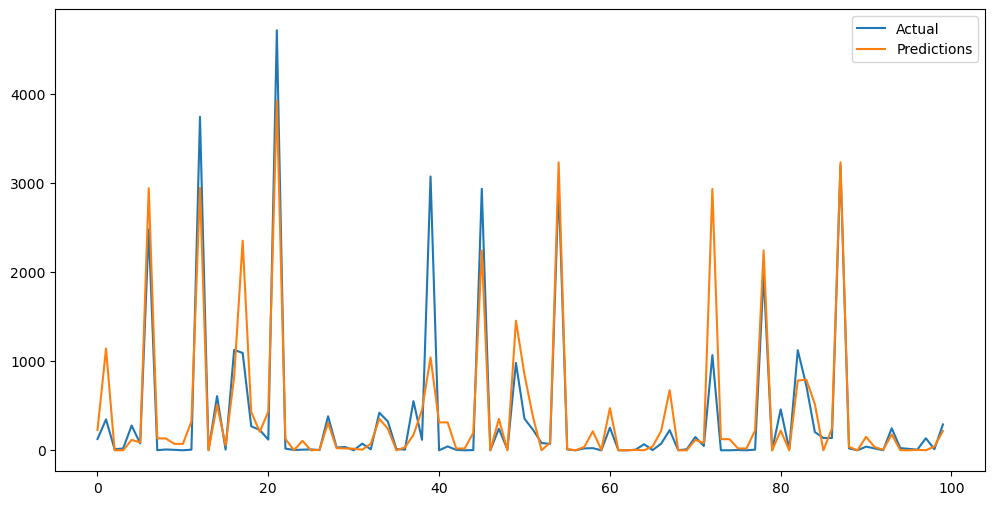

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(y_test[300100:300200], label='Actual')
plt.plot(y_pred[300100:300200], label='Predictions')
plt.legend()
plt.show()